<h1> PTRAIL Semantic Features </h1>

<p align='justify'>
    This Jupyter notebook contains several examples of the usage]
    of Semantic Features that PTRAIL offers. When we say
    semantics, we mean that taking in geographical layers around
    the trajectory along with trajectory data and calculating
    features like intersection of trajectories, presence of
    trajectories inside a given polygon and other such features.

<hr>
The following Datasets have been used in the Jupyter Notebook:
</p>

<ol align='justify'>
       <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/starkey_habitat.csv" target="_blank"> Starkey Habitat Data</a> </li>
       <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/starkey.csv" target="_blank"> Starkey Trajectory Data </a> </li>
</ol>

<hr>
<p align='justify'>
Note: Viewing this notebook in GitHub will not render JavaScript
elements. Hence, for a better experience, click the link below
to open the Jupyter notebook in NB viewer.

<span> &#8618; </span>
<a href="https://nbviewer.jupyter.org/github/YakshHaranwala/PTRAIL/blob/main/examples/9.%20Semantic_features.ipynb" target='_blank'> Click </a>
</p>

In [1]:
# First, lets import the starkey dataset and the habitat data
# and then check both out. Now it is to be noted that since
# the habitat dataset is not an actual trajectory dataset, we
# will just import the habitat dataset as a pandas dataframe.
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

from ptrail.core.TrajectoryDF import PTRAILDataFrame
import pandas as pd
from ptrail.features.semantic_features import SemanticFeatures as sem
from ptrail.visualization.TrajPlotter import TrajectoryPlotter as tjplt

pd.set_option('display.max_columns', 500)

pdf = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/starkey.csv')
starkey_traj = PTRAILDataFrame(data_set=pdf,
                               latitude='lat',
                               longitude='lon',
                               datetime='DateTime',
                               traj_id='Id')
print(starkey_traj)
starkey_traj.head()

------------------------ Dataset Facts ------------------------------

Number of unique Trajectories in the data: 253
Number of points in the data: 287136
Dataset time range: 1196 days 22:51:45
Datatype of the DataFrame: <class 'ptrail.core.TrajectoryDF.PTRAILDataFrame'>
Dataset Bounding Box: (45.18896978643169, -118.61020848239596, 45.314545642992, -118.50455596234036)

---------------------------------------------------------------------


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum  Species  \
traj_id   DateTime                                                             
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409        0   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409        0   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409        0   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409        0   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409        0   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [2]:
# Now, importing the habitat data.
starkey_habitat = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/starkey_habitat.csv')
print(f"The shape of the starkey habitat dataset: {starkey_habitat.shape}")
starkey_habitat.head()

The shape of the starkey habitat dataset: (85969, 19)


,lat,lon,SoilDpth,PerSlope,SINAspct,COSAspct,Convex3,DistCWat,Canopy,Elev,DistEWat,EcoGener,DistOPEN,DistRSTR,DistCLSD,DistEFnc,CowPast,ForgProd,DistEdge
0,45.272378,-118.610193,14,5,-0.81,0.59,500.63,218,3,1389,212,GB,127,2271,30,0,SMITH-BALLY,363,0
1,45.272648,-118.610201,14,5,-0.71,0.71,500.21,228,3,1388,218,GB,150,2293,30,0,SMITH-BALLY,363,0
2,45.272918,-118.610208,14,4,-0.89,0.45,499.93,242,3,1387,228,GB,170,2315,30,0,SMITH-BALLY,363,0
3,45.270224,-118.609750,14,8,-0.98,0.21,500.68,201,5,1393,201,GB,30,2081,134,0,SMITH-BALLY,363,0
4,45.270494,-118.609757,14,7,-0.97,0.22,501.22,190,5,1393,190,GB,30,2101,108,0,SMITH-BALLY,363,0


In [3]:
# Checking what pastures are present in the habitat data
# as well as number of points present in each pasture.
starkey_habitat['CowPast'].value_counts()

BEAR           38216
SMITH-BALLY    26363
MDWCRK         12830
HALFMOON        6205
HORSE           1444
STRIP            907
NE                 2
Name: CowPast, dtype: int64

In [4]:
%%time

# Now, lets check whether the trajectories in the trajectory
# dataset have visited the pasture named Smith-Bally or not.
# As per the requirements of the method, we need to pass in:
#   1. The trajectory dataframe
#   2. Geographical layers, the location's
#   3. Name for which we want to check if the object visited the
#      location or not.
#   4. The name of the column that contains the location data
#      in the geographical layers dataframe.

pasture_visited = sem.visited_location(df=starkey_traj,
                                       geo_layers=starkey_habitat,
                                       visited_location_name = 'SMITH-BALLY',
                                       location_column_name='CowPast')
pasture_visited.head()

/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CPU times: user 1min 2s, sys: 540 ms, total: 1min 2s
Wall time: 1min 2s


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum  Species  \
traj_id   DateTime                                                             
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409        0   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409        0   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409        0   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409        0   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409        0   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt Visited_SMITH-BALLY  
traj_id   DateTime                                        
880109D01 1995-04-13 13:40:06   1.47                   0  
          1995-04-15 12:16:15   1.59                   0  
          1995-04-15 21:39:38   1.34                   0  
          1995-04-16 03:32:14   1.50                   0  
          1995-04-16 04:08:28   1.34                   0

In [5]:
# Now, lets filter out a single trajectory from the
# original dataset.
single_traj = starkey_traj.reset_index().loc[
    starkey_traj.reset_index()['traj_id'] == '880109D01']
single_traj = PTRAILDataFrame(single_traj,
                              latitude='lat',
                              longitude='lon',
                              datetime='DateTime',
                              traj_id='traj_id')
print(single_traj.shape)

# Also, lets filter out data about only 2 pastures from starkey
# area called BEAR and STRIP.
pastures = ["BEAR", "STRIP"]
pasture = starkey_habitat.loc[starkey_habitat['CowPast'].isin(pastures)]
print(pasture.shape)

(214, 15)
(39123, 19)


In [6]:
%%time

# Now, we will check that the single trajectory that we filtered
# out above has visited water bodies inside the 2 pastures
# that we filtered out.
# Now it is to be noted that the method has a requirement of
# presence of a distance from nearest water body from a point.
# Here, we have taken an example of a waterbody, this method
# can be generally used for any type of POI visited. All that
# is needed is the presence of a distance of POI from the
# current coordinates.

water_visited = sem.visited_poi(df=single_traj,
                                surrounding_data=pasture,
                                dist_column_label='DistEWat',
                                nearby_threshold=10)
water_visited.head()

1
Done
CPU times: user 38.3 ms, sys: 116 ms, total: 155 ms
Wall time: 2min 5s


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum  Species  \
traj_id   DateTime                                                             
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409        0   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409        0   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409        0   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409        0   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409        0   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  Nearby_POI  
traj_id   DateTime                                
880109D01 1995-04-13 13:40:06   1.47        True  
          1995-04-15 12:16:15   1.59        True  
          1995-04-15 21:39:38   1.34        True  
          1995-04-16 03:32:14   1.50        True  
          1995-04-16 04:08:28   1.34        True

In [7]:
# Here, we are filtering out another single pasture from the
# original dataframe to convert it to polygon for a demonstration
# of another feature that PTRAIL Provides.

mini_pasture = starkey_habitat.loc[starkey_habitat['CowPast'] == 'BEAR']

# Convert to Polygon using the shapely library.
# KEEP A NOTE OF THE FORMAT: (longitude, latitude) FOR THE
# COORDINATES.
coords = list(zip(mini_pasture['lon'], (mini_pasture['lat'])))
poly = Polygon(coords)
poly.bounds

(-118.5871843366618, 45.18894906057605, -118.50491651227532, 45.25944702133768)

In [8]:
%%time

# Now, lets check which trajectories have visited the polygon
# that we created above. If the trajectory has visited the
# polygon, then the points inside the polygon are given out,
# creating sub-trajectories of points inside the polygon out
# of the entire polygon.

filt_traj = sem.trajectories_inside_polygon(starkey_traj, poly)
filt_traj.head()

/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CPU times: user 4min 20s, sys: 425 ms, total: 4min 20s
Wall time: 4min 21s


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum  Species  \
traj_id   DateTime                                                             
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409        0   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409        0   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409        0   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409        0   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409        0   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [9]:
# Lets check the sub trajectories inside the polygon.

tjplt.show_trajectories(filt_traj)

Output()

In [10]:
%%time

# For the final feature demonstration, lets filter out 2
# trajectories T1 and T2 from the original dataset.

t1 = starkey_traj.reset_index().loc[starkey_traj.reset_index()['traj_id'] == '910313E37']
t1 = PTRAILDataFrame(t1,
                     latitude='lat',
                     longitude='lon',
                     datetime='DateTime',
                     traj_id='traj_id')

t2 = starkey_traj.reset_index().loc[starkey_traj.reset_index()['traj_id'] == '890424E08']
t2 = PTRAILDataFrame(t2,
                     latitude='lat',
                     longitude='lon',
                     datetime='DateTime',
                     traj_id='traj_id')

CPU times: user 331 ms, sys: 0 ns, total: 331 ms
Wall time: 329 ms


In [11]:
%%time

# Now, given a polygon and 2 trajectories T1 and T2, we will
# check whether T1 and T2 intersect inside the polygon or not.

# It is to be kept in mind that there is no checking of time of
# intersection of the trajectories and the trajectories T1 and
# T2 might have crossed paths hours or days apart.

# Finally, it should also be noted that if T1 and T2 intersect
# at all, then only the following columns are given out:
#   1. Trajectory ID of T1 (traj_id_1).
#   2. DateTime of T1 (DateTime_1).
#   3. latitude of intersection.
#   4. longitude of intersection.
#   5. Trajectory ID of T2 (traj_id_2)
#   5. DateTime of T2 (DateTime_2)

inside_poly = sem.traj_intersect_inside_polygon(t1, t2, poly)
inside_poly.head()

/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CPU times: user 17 s, sys: 12 ms, total: 17 s
Wall time: 17 s


,traj_id_1,DateTime_1,lat,lon,traj_id_2,DateTime_2
0,910313E37,1993-05-06 18:40:04,45.220128,-118.561336,890424E08,1993-05-29 00:35:17
1,910313E37,1993-05-06 19:04:22,45.219297,-118.562842,890424E08,1993-05-31 20:01:27
2,910313E37,1993-05-06 21:38:07,45.213950,-118.558875,890424E08,1993-05-15 06:04:27
3,910313E37,1993-05-06 23:52:45,45.212907,-118.556172,890424E08,1994-04-12 22:55:06
4,910313E37,1993-05-07 01:39:28,45.213956,-118.558493,890424E08,1993-06-08 17:27:34


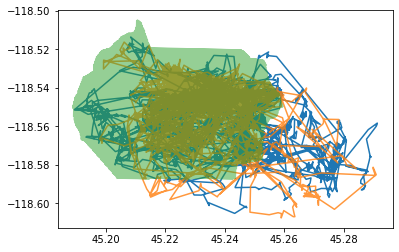

In [12]:
# Finally, using matplotlib, lets show where T1 and T2
# intersect inside the polygon.

plt.plot(t1['lat'], t1['lon']),
plt.plot(t2['lat'], t2['lon'], alpha=0.8),
plt.plot(mini_pasture['lat'], mini_pasture['lon'], alpha=0.5)